<a href="https://colab.research.google.com/github/ahr1223/Predict-Crop-Yield-Category/blob/main/Predict_Crop_Yield_Category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
file_path = '/crop_yield.csv'
df = pd.read_csv(file_path)
print(df.head())


   soil_quality    rainfall seed_type yield_category
0      5.787214  376.596391         C            low
1      2.222101  787.223810         A            low
2      1.893720  810.077116         A         medium
3      2.879777  943.405918         C         medium
4      9.330736  224.439566         C         medium


Missing values per column:
 soil_quality      0
rainfall          0
seed_type         0
yield_category    0
dtype: int64
Columns in dataset: ['soil_quality', 'rainfall', 'seed_type', 'yield_category']
Encoded column 'seed_type' with classes: ['A' 'B' 'C']
Encoded column 'yield_category' with classes: ['high' 'low' 'medium']
Training set size: 80 samples
Test set size: 20 samples


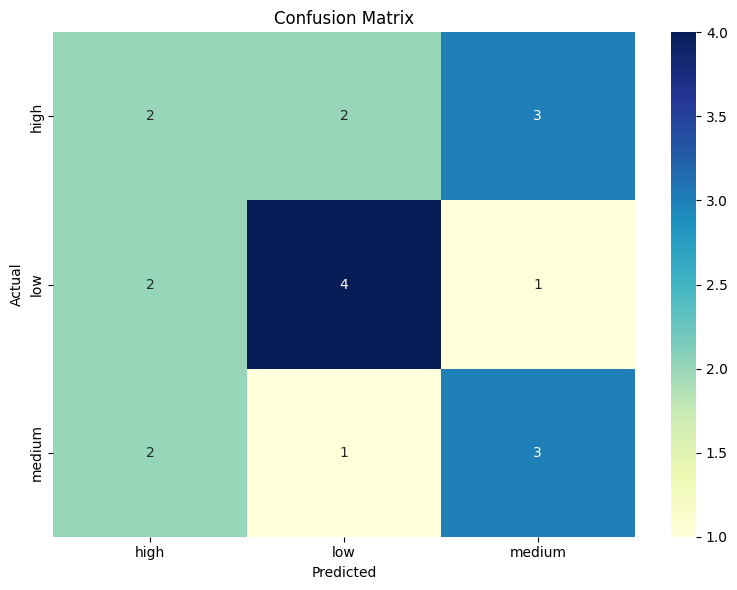


✅ Evaluation Metrics:
Accuracy: 0.4500
Precision (macro): 0.4444
Recall (macro): 0.4524

📋 Detailed Classification Report:
              precision    recall  f1-score   support

        high       0.33      0.29      0.31         7
         low       0.57      0.57      0.57         7
      medium       0.43      0.50      0.46         6

    accuracy                           0.45        20
   macro avg       0.44      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20


🔍 Feature Importance:
        Feature  Importance
0  soil_quality    0.510236
1      rainfall    0.419603
2     seed_type    0.070161


In [32]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import os

# Load your CSV file with error handling
file_path = '/crop_yield.csv'
try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File {file_path} not found. Please check the file path.")
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error loading file: {e}")
    exit(1)

# Check for missing values and drop them
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)
if missing_values.sum() > 0:
    print(f"Dropping {df.isnull().any(axis=1).sum()} rows with missing values.")
    df = df.dropna()

# Verify column names
print("Columns in dataset:", df.columns.tolist())
feature_cols = ['soil_quality', 'rainfall', 'seed_type']

target_col = 'yield_category'

# Check if specified columns exist
missing_cols = [col for col in feature_cols + [target_col] if col not in df.columns]
if missing_cols:
    print(f"Error: Columns {missing_cols} not found in dataset.")
    exit(1)

# Encode categorical columns
label_encoders = {}
for col in feature_cols + [target_col]:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
        print(f"Encoded column '{col}' with classes: {le.classes_}")

# Define features and target
X = df[feature_cols]
y = df[target_col]

# Check if target has enough classes
if len(y.unique()) < 2:
    print("Error: Target variable has fewer than 2 classes. Cannot proceed with classification.")
    exit(1)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the classifier with tuned hyperparameters
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
try:
    clf.fit(X_train, y_train)
except Exception as e:
    print(f"Error training model: {e}")
    exit(1)

# Predictions
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=label_encoders[target_col].classes_,
            yticklabels=label_encoders[target_col].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Evaluation metrics
print("\n✅ Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.4f}")

# Detailed classification report
print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders[target_col].classes_))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\n🔍 Feature Importance:")
print(feature_importance)